# Assignment 6.- Convolutional Neural Network.

Team:


*   Alessandra Nayeli Arenas Escalante — 1994279 — N2
*   Andrea Victoria Carrizosa Bernal — 2049922 — N2


*   Diego Iván Sánchez Vargas — 2132200 — N2
*   Perla Rubí Rodriguez Trejo — 1997169 — N2

Class: AI

Professor: Daniel Isaías López Páez

Date: 14/11/2025

## Introduction

Convolutional Neural Networks (CNNs) are a specialized type of deep learning model designed to process data with spatial structure, such as images. Unlike traditional fully connected neural networks, CNNs use convolutional operations that automatically extract meaningful features, such as edges, textures, and more complex visual patterns, directly from the input data. This allows CNNs to recognize visual characteristics in a way that resembles how the human visual system interprets images. Because of these capabilities, CNNs have become one of the most effective and widely used architectures in image classification, object recognition, and general computer vision tasks.

As these networks process an image, each convolutional layer learns increasingly abstract representations of the visual information. Early layers typically detect basic patterns like lines or corners, while deeper layers capture higher level concepts such as shapes or digit structures. Pooling layers further help reduce dimensionality and emphasize the most important features. Through this layered learning process, CNNs are able to generalize well and achieve high accuracy even when trained on relatively simple datasets. Their efficiency and adaptability have made them central to modern artificial intelligence applications, ranging from medical image analysis to autonomous vehicles and handwriting recognition systems.

In this activity, CNNs are applied to train a model capable of recognizing handwritten digits using the MNIST dataset. This dataset consists of thousands of low-resolution grayscale images, making it an ideal introduction to how convolutional networks interpret and learn visual information. By implementing the model in Google Colab, it is possible to follow the entire workflow, from data preprocessing to training and prediction, highlighting the practicality of CNNs in real world visual recognition problems.

## Methodology

### Load libraries

In this first cell, the necessary libraries for the entire project are imported. TensorFlow and Keras provide the tools required to build and train the convolutional neural network, Matplotlib is included to display images and graphs throughout the process, and NumPy is used for handling numerical operations efficiently.

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### Load data

The second cell focuses on loading the MNIST dataset using Keras’s built-in load_data() function. This dataset is automatically divided into training images and labels and testing images and labels, which will later be used to evaluate the model’s performance. At this point, the data is loaded exactly as it exists in the dataset, without any preprocessing or transformations applied.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### Data preprocessing

The third cell handles the preprocessing of the images to prepare them for the neural network. The images are reshaped to include an additional channel dimension, which is required when working with convolutional layers. The pixel values are then normalized by dividing them by 255, ensuring that the inputs fall within the range of 0 to 1, which generally improves training performance. After this, a collection of 25 sample images from the training set is displayed in a grid, each labeled with the correct digit.

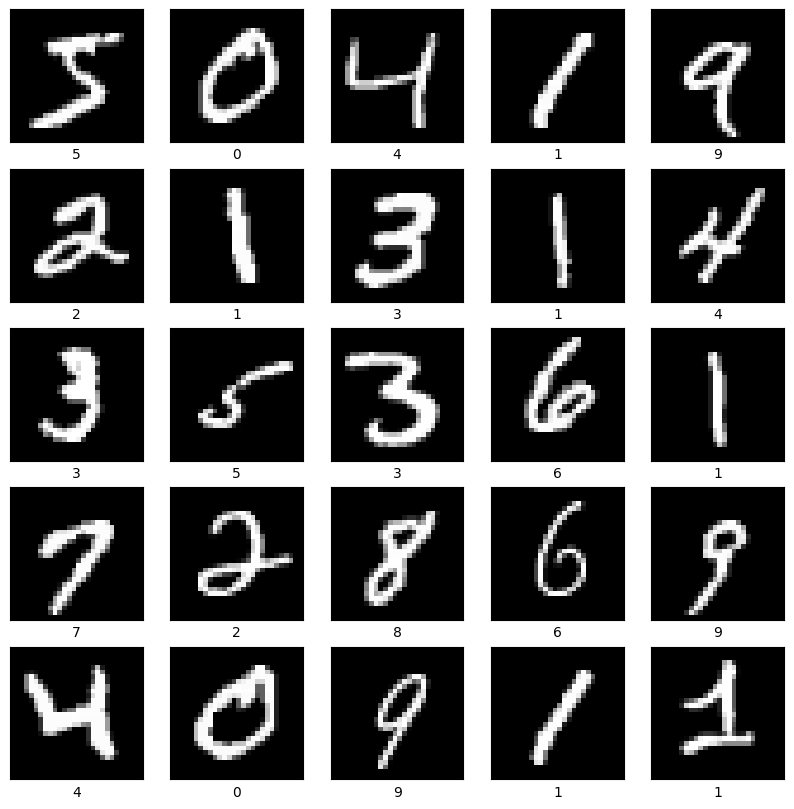

In [3]:
# MNIST images 28x28 grayscale are reshaped to 28x28x1 for CNN
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

class_names = [str(i) for i in range(10)]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28,28), cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Model selection and training

In this cell, the first part of the convolutional neural network is defined. The model begins with several convolutional layers that learn to detect visual features such as edges, shapes, and textures within the images. Between these layers, max-pooling layers are added to reduce the spatial dimensions of the feature maps, which helps the model generalize better and reduces computational cost.

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


This cell provides a summary of the model constructed so far. It prints an organized breakdown of each layer, including the convolutional and pooling layers, their output shapes, and the number of trainable parameters they contain.

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

This sixth cell completes the neural network by adding the classifier layers that transform the extracted features into final predictions. The Flatten layer converts the multi-dimensional feature maps from the convolutional base into a single long vector, which can then be processed by fully connected Dense layers. A hidden Dense layer with activation functions learns high-level patterns, and the final Dense layer outputs ten values, each corresponding to one of the possible digits from 0 to 9.

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))   # logits layer

Afterwards, a  summary of the entire network is printed. This includes  the convolutional feature extraction layers and the Dense classification layers added in the previous cell. The summary shows the full layer architecture, the flow of data shapes throughout the model, and the total number of parameters that will be trained.

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

The model is compiled with the chosen optimizer, loss function, and accuracy metric, and then the training process begins. The Adam optimizer adjusts the model’s parameters, while the sparse categorical cross-entropy loss function measures how far the predictions are from the true labels. Over ten epochs, the network learns to classify the digits by repeatedly processing the training images. During training, accuracy and loss values for both the training and validation sets are displayed.

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.8966 - loss: 0.3394 - val_accuracy: 0.9865 - val_loss: 0.0455
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9854 - loss: 0.0483 - val_accuracy: 0.9881 - val_loss: 0.0367
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9909 - loss: 0.0303 - val_accuracy: 0.9906 - val_loss: 0.0281
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9928 - loss: 0.0225 - val_accuracy: 0.9915 - val_loss: 0.0314
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9938 - loss: 0.0192 - val_accuracy: 0.9902 - val_loss: 0.0303
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9954 - loss: 0.0147 - val_accuracy: 0.9902 - val_loss: 0.0366
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9964 - loss: 0.0115 - val_accuracy: 0.9905 - val_loss: 0.0358
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9970 -

### Model testing

This cell visualizes the training process by plotting the accuracy for the training and validation sets across all epochs. This graph helps identify how well the model learned and whether issues such as overfitting may be present. After the graph is shown, the model is evaluated using the test dataset, and the resulting test accuracy and test loss are printed.

313/313 - 4s - 11ms/step - accuracy: 0.9912 - loss: 0.0420


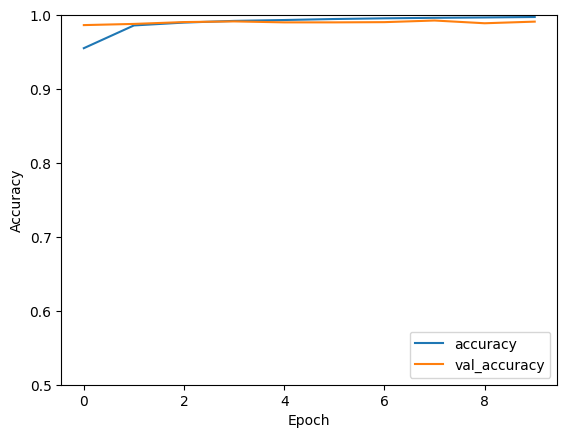

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

The final cell displays the trained model’s test accuracy for clarity and then performs five individual predictions using images from the test set. For each selected test image, the predicted digit and the actual correct digit are printed.

Test accuracy: 0.9911999702453613
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Prediction: 7  |  Actual: 7


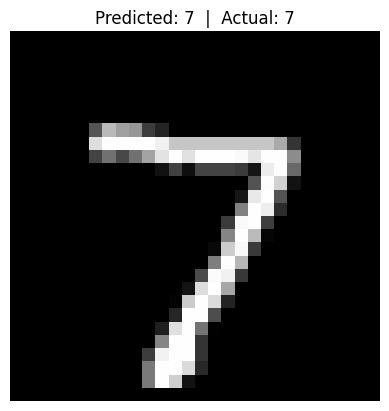

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Prediction: 2  |  Actual: 2


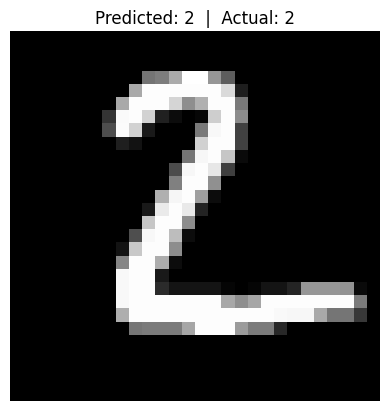

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Prediction: 1  |  Actual: 1


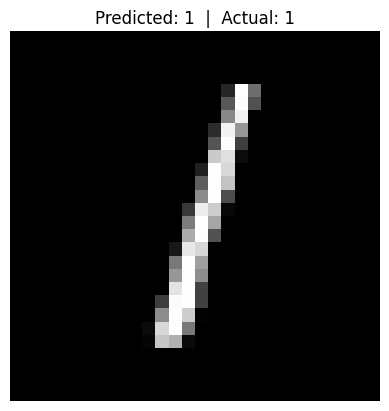

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Prediction: 0  |  Actual: 0


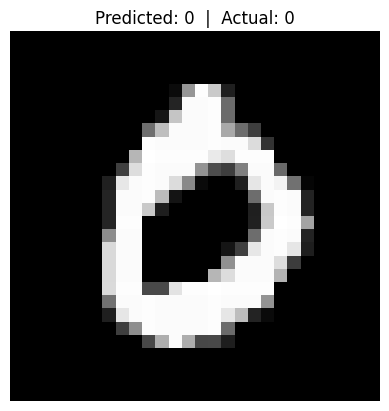

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Prediction: 4  |  Actual: 4


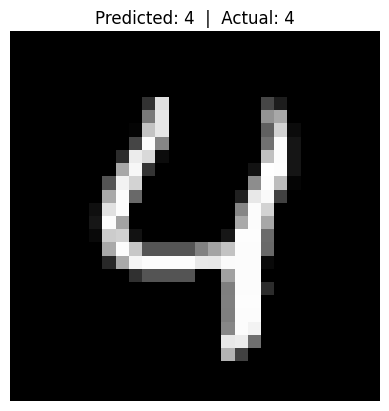

In [10]:
print("Test accuracy:", test_acc)

probability_model = tf.keras.Sequential([model, layers.Softmax()])

for i in range(5):
    prediction = np.argmax(probability_model.predict(test_images[i:i+1])[0])
    actual = test_labels[i]

    print(f"Prediction: {prediction}  |  Actual: {actual}")

    # Mostrar la imagen
    plt.imshow(test_images[i].reshape(28,28), cmap="gray")
    plt.title(f"Predicted: {prediction}  |  Actual: {actual}")
    plt.axis("off")
    plt.show()

## Results

The convolutional neural network demonstrated fast and consistent learning throughout the 10 training epochs, achieving a significantly higher accuracy than the feedforward model from the previous assignment. The training and validation curves showed stable convergence, with the model reaching over 99% accuracy on the test dataset. When evaluating individual samples, the CNN correctly classified all test images, and the predictions matched the actual labels with a very high degree of confidence. The visualizations confirmed that the model successfully captured the spatial characteristics of the handwritten digits, resulting in precise and reliable predictions. Overall, the performance observed in the results reflects the strong generalization ability of convolutional architectures for image-based classification tasks.

## General conclusion

The results of this activity clearly show how effective a convolutional neural network can be when working with images like the handwritten digits in the MNIST dataset. During training, the CNN showed efficient learning, reaching high accuracy in just a few epochs and outperforming the feedforward model used previously. The training curves reflected a stable learning process, suggesting that the model generalized well rather than simply memorizing the data. Additionally, the evaluation of individual test samples showed that the network consistently identified the digits correctly, with predictions that closely matched the actual labels.

## Questions



1.   How many epochs did you use to improve the performance of the model compared with the feedforward neural network of assignment 6?

In the previous assignment, the feedforward neural network was trained for twenty epochs. For this activity, the convolutional neural network was trained for only ten epochs, achieving a higher accuracy even with fewer iterations. This means that the CNN required half the number of epochs to reach a better performance. Therefore, the model improved its results with 10 epochs, showing that CNNs learn more efficiently when working with image-based datasets like MNIST.


2.   Did you get a better performance on this assignment or on assignment 6? Why?

The model from this assignment showed a better performance compared to the feedforward neural network from assignment 6. The CNN reached a higher accuracy because convolutional layers are designed to extract spatial and visual patterns directly from images, something that fully connected networks cannot do as effectively. By preserving the structure of the digits and learning features automatically, the CNN generalizes better and produces more accurate predictions. For this reason, the performance in this assignment is superior.

## References



*   Chollet, F. (2018). Deep learning with Python. Manning Publications.



*   Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc." https://www.tensorflow.org/tutorials/images/cnn

*   Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT Press.


*   Matthes, E. (2023). Python crash course. No starch press. https://www.w3schools.com/python/default.asp




